In [1]:
import scipy.io
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def get_hsi(ratio=.1, dir='dataset/AnkaraHSIArchive'):
    X, Y = [], []

    dfs = pd.read_excel('dataset/AnkaraHSIArchive/Labels.xlsx',
                        sheet_name='Land-Use Categories')

    for file in os.listdir(dir):
        if file.endswith('.mat'):
            X.append(scipy.io.loadmat(os.path.join(dir, file))['patch'])
            i = int(file.split('_')[0]) - 1
            # print(file, i, dfs.iat[i, 0], dfs.iat[i, 1]) # FIXME. double check.
            Y.append(dfs.iat[i, 1] - 1)
    return train_test_split(np.array(X), np.array(Y), test_size=ratio, random_state=42)

In [3]:
def show_img(X_train, Y_train):
    plt.figure(figsize=(10, 10))
    class_names = ['Rural Area', 'Urban Area', 'Cultivated Land', 'Forest']

    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_train[i][:, :, 10], cmap=plt.cm.binary)
        plt.xlabel(class_names[Y_train[i]])
    plt.show()

In [20]:
def create_model():
    num_classes = 4

    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(63, 63, 119)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes))
    model.summary()
    return model

In [6]:
def train_model(model, X_train, Y_train, X_test, Y_test):
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(X_train, Y_train, epochs=10,
                        validation_data=(X_test, Y_test))
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

In [12]:
X_train, X_test, Y_train, Y_test = get_hsi()
X_train.shape, Y_train.shape

((194, 63, 63, 119), (194,))

In [13]:
X_test.shape, Y_test.shape

((22, 63, 63, 119), (22,))

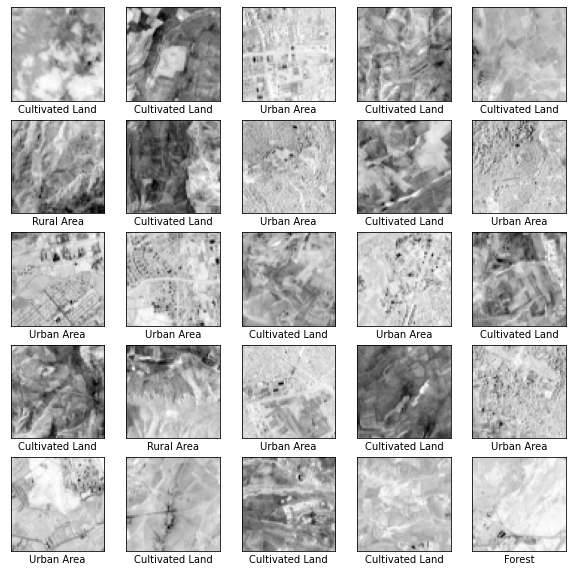

In [14]:
show_img(X_train, Y_train)

In [21]:
model = create_model()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 61, 61, 32)        34304     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

Epoch 1/10
7/7 [==============================] - 3s 429ms/step - loss: 1.2488 - accuracy: 0.4794 - val_loss: 0.9633 - val_accuracy: 0.7727
Epoch 2/10
7/7 [==============================] - 3s 388ms/step - loss: 1.1525 - accuracy: 0.5619 - val_loss: 0.7580 - val_accuracy: 0.7727
Epoch 3/10
7/7 [==============================] - 3s 387ms/step - loss: 1.1092 - accuracy: 0.5619 - val_loss: 0.9082 - val_accuracy: 0.7727
Epoch 4/10
7/7 [==============================] - 3s 386ms/step - loss: 1.0588 - accuracy: 0.5619 - val_loss: 0.7616 - val_accuracy: 0.7727
Epoch 5/10
7/7 [==============================] - 3s 404ms/step - loss: 1.1195 - accuracy: 0.5619 - val_loss: 0.8790 - val_accuracy: 0.7727
Epoch 6/10
7/7 [==============================] - 3s 408ms/step - loss: 1.0837 - accuracy: 0.5619 - val_loss: 0.8150 - val_accuracy: 0.7727
Epoch 7/10
7/7 [==============================] - 3s 390ms/step - loss: 1.0583 - accuracy: 0.5619 - val_loss: 0.9511 - val_accuracy: 0.7727
Epoch 8/10
7/7 [====

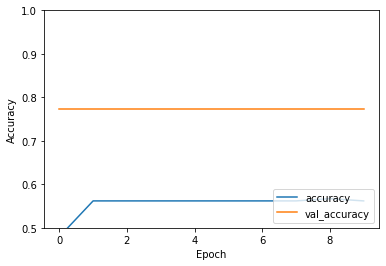

In [22]:
train_model(model, X_train, Y_train, X_test, Y_test)